# Sentiment Analysis on Movie Reviews



# Data Exploration: Exploring the Dataset



In [1]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv' , header=None, names=["review", "sentiment"])
# Convert positive sentiment to 1 and negative sentiment to 0
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)
# Print the number of positive and negative reviews
print("Number of positive reviews:", df[df["sentiment"] == 1].shape[0])
print("Number of negative reviews:", df[df["sentiment"] == 0].shape[0])

# Print the length statistics of the reviews
review_lengths = df["review"].apply(len)
print("Maximum review length:", review_lengths.max())
print("Minimum review length:", review_lengths.min())
print("Average review length:", review_lengths.mean())


Number of positive reviews: 25000
Number of negative reviews: 25001
Maximum review length: 13704
Minimum review length: 6
Average review length: 1309.404951900962


# Data Preproccessing

In [2]:

#missing values
print("Number of missing values:", df.isnull().sum().sum())


Number of missing values: 0


In [3]:
import re
#remove noise and special characters, such as "[[^]]*]", etc.
df["review"] = df["review"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))
print(df)

                                                  review  sentiment
0                                                 review          0
1      One of the other reviewers has mentioned that ...          1
2      A wonderful little production   br    br   The...          1
3      I thought this was a wonderful way to spend ti...          1
4      Basically there s a family where a little boy ...          0
...                                                  ...        ...
49996  I thought this movie did a down right good job...          1
49997  Bad plot  bad dialogue  bad acting  idiotic di...          0
49998  I am a Catholic taught in parochial elementary...          0
49999  I m going to have to disagree with the previou...          0
50000  No one expects the Star Trek movies to be high...          0

[50001 rows x 2 columns]


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
#transform all words to lower case
df["review"] = df["review"].apply(lambda x: x.lower())
print(df)

                                                  review  sentiment
0                                                 review          0
1      one of the other reviewers has mentioned that ...          1
2      a wonderful little production   br    br   the...          1
3      i thought this was a wonderful way to spend ti...          1
4      basically there s a family where a little boy ...          0
...                                                  ...        ...
49996  i thought this movie did a down right good job...          1
49997  bad plot  bad dialogue  bad acting  idiotic di...          0
49998  i am a catholic taught in parochial elementary...          0
49999  i m going to have to disagree with the previou...          0
50000  no one expects the star trek movies to be high...          0

[50001 rows x 2 columns]


In [5]:
import nltk
import re

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
#transform all words to lower case
df["review"] = df["review"].apply(lambda x: x.lower())
print(df)

#tokenization
df["review"] = df["review"].apply(lambda x: nltk.word_tokenize(x))
print(df)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                  review  sentiment
0                                                 review          0
1      one of the other reviewers has mentioned that ...          1
2      a wonderful little production   br    br   the...          1
3      i thought this was a wonderful way to spend ti...          1
4      basically there s a family where a little boy ...          0
...                                                  ...        ...
49996  i thought this movie did a down right good job...          1
49997  bad plot  bad dialogue  bad acting  idiotic di...          0
49998  i am a catholic taught in parochial elementary...          0
49999  i m going to have to disagree with the previou...          0
50000  no one expects the star trek movies to be high...          0

[50001 rows x 2 columns]
                                                  review  sentiment
0                                               [review]          0
1      [one, of, the, 

In [8]:
#stop words removing and stemming
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Remove stop words and perform stemming
stop_words = stopwords.words("english")
ps = PorterStemmer()
df["review"] = df["review"].apply(lambda x: [ps.stem(word) for word in x if word not in stop_words])
print(df)


                                                  review  sentiment
0                                               [review]          0
1      [one, review, mention, watch, 1, oz, episod, h...          1
2      [wonder, littl, product, br, br, film, techniq...          1
3      [thought, wonder, way, spend, time, hot, summe...          1
4      [basic, famili, littl, boy, jake, think, zombi...          0
...                                                  ...        ...
49996  [thought, movi, right, good, job, creativ, ori...          1
49997  [bad, plot, bad, dialogu, bad, act, idiot, dir...          0
49998  [cathol, taught, parochi, elementari, school, ...          0
49999  [go, disagre, previou, comment, side, maltin, ...          0
50000  [one, expect, star, trek, movi, high, art, fan...          0

[50001 rows x 2 columns]


In [10]:
# Convert the tokenized review back to a string
df["review"] = df["review"].apply(lambda x: " ".join(x))
print(df)

                                                  review  sentiment
0                                                 review          0
1      one review mention watch 1 oz episod hook righ...          1
2      wonder littl product br br film techniqu unass...          1
3      thought wonder way spend time hot summer weeke...          1
4      basic famili littl boy jake think zombi closet...          0
...                                                  ...        ...
49996  thought movi right good job creativ origin fir...          1
49997  bad plot bad dialogu bad act idiot direct anno...          0
49998  cathol taught parochi elementari school nun ta...          0
49999  go disagre previou comment side maltin one sec...          0
50000  one expect star trek movi high art fan expect ...          0

[50001 rows x 2 columns]


In [11]:
# Split the dataset into train and test sets
train_size = 0.75  # proportion of the dataset to use for training
random_state = 42  # set random state for reproducibility
X = df["review"]
print(df["review"])
y = df["sentiment"]
print(df["sentiment"])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

# Print the size of the training and test sets
print("Size of training set:", len(X_train))
print("Size of test set:", len(X_test))

0                                                   review
1        one review mention watch 1 oz episod hook righ...
2        wonder littl product br br film techniqu unass...
3        thought wonder way spend time hot summer weeke...
4        basic famili littl boy jake think zombi closet...
                               ...                        
49996    thought movi right good job creativ origin fir...
49997    bad plot bad dialogu bad act idiot direct anno...
49998    cathol taught parochi elementari school nun ta...
49999    go disagre previou comment side maltin one sec...
50000    one expect star trek movi high art fan expect ...
Name: review, Length: 50001, dtype: object
0        0
1        1
2        1
3        1
4        0
        ..
49996    1
49997    0
49998    0
49999    0
50000    0
Name: sentiment, Length: 50001, dtype: int64
Size of training set: 37500
Size of test set: 12501


# Data Modelling


    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN 


In [12]:
pip install tensorflow

In [13]:
pip install keras

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve # Import necessary functions
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.compat.v1 as tf



Logistic Regression

Accuracy: 0.9052875769938405

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      6255
    positive       0.90      0.91      0.91      6246

    accuracy                           0.91     12501
   macro avg       0.91      0.91      0.91     12501
weighted avg       0.91      0.91      0.91     12501


Confusion Matrix:
[[5603  652]
 [ 532 5714]]


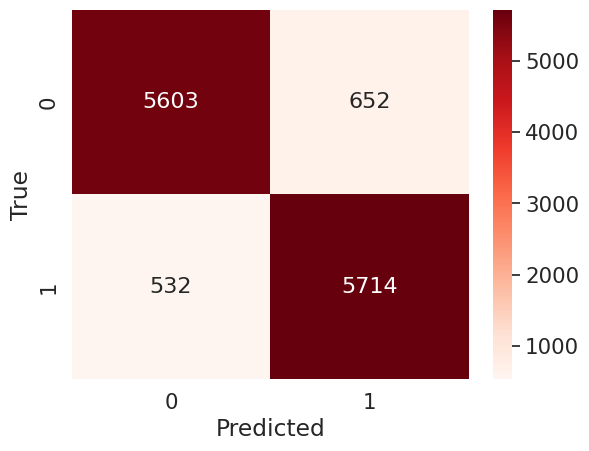

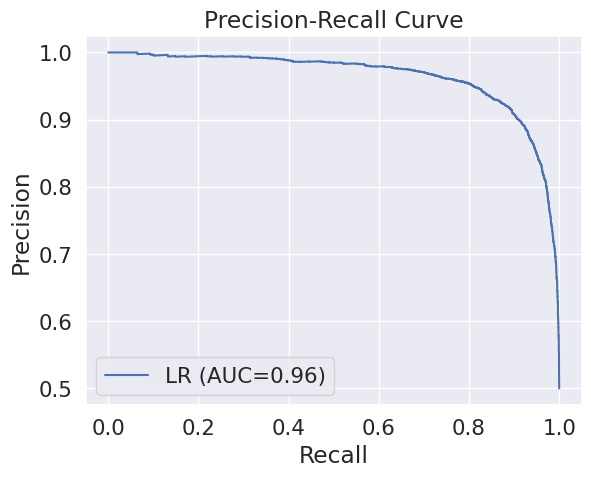

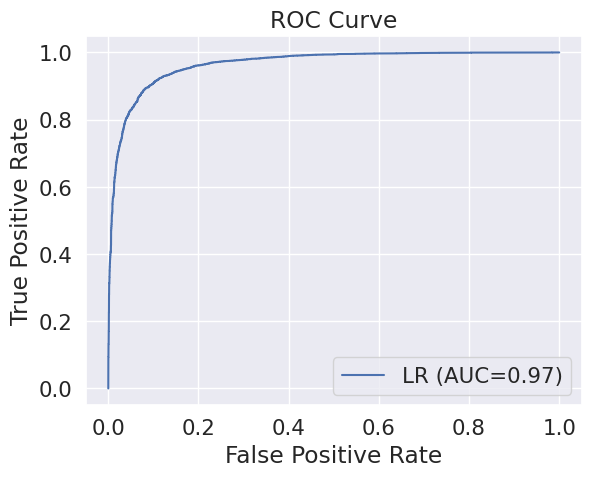

In [15]:
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv", header=None, names=["review", "sentiment"])

# Define the features and target
X = df["review"]
y = df["sentiment"]

# Create a Tfidf representation of the reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 16}, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert labels in y_true from strings to integers
le = LabelEncoder()
y_true = le.fit_transform(y_test)

# Compute precision, recall, and thresholds for the model
precision, recall, thresholds = precision_recall_curve(y_true, lr.predict_proba(X_test)[:, 1])
area_under_curve = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f"LR (AUC={area_under_curve:.2f})")

# Add labels and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Show the plot
plt.show()

# Compute true positive rate, false positive rate, and thresholds for the model
fpr, tpr, thresholds = roc_curve(y_true, lr.predict_proba(X_test)[:, 1])
area_under_curve = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"LR (AUC={area_under_curve:.2f})")

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Show the plot
plt.show()



LinearSVC

Accuracy: 0.9018478521718263

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6255
           1       0.90      0.91      0.90      6246

    accuracy                           0.90     12501
   macro avg       0.90      0.90      0.90     12501
weighted avg       0.90      0.90      0.90     12501


Confusion Matrix:
[[5593  662]
 [ 565 5681]]


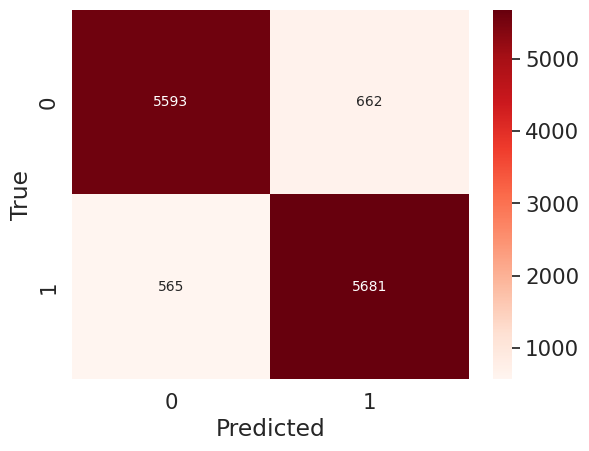

In [16]:
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv", header=None, names=["review", "sentiment"])

# Convert positive sentiment to 1 and negative sentiment to 0
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)

# Define the features and target
X = df["review"]
y = df["sentiment"]

# Create a Tfidf representation of the reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a LinearSVC model
svc = LinearSVC()
svc.fit(X_train, y_train)

# Predict on the testing set
y_pred = svc.predict(X_test)

# Evaluate the performance of the model
lsvc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lsvc_accuracy)

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 10}, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KNeighborsClassifier

Accuracy: 0.7684985201183905

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.74      0.76      6255
    positive       0.76      0.79      0.77      6246

    accuracy                           0.77     12501
   macro avg       0.77      0.77      0.77     12501
weighted avg       0.77      0.77      0.77     12501


Confusion Matrix:
[[4648 1607]
 [1287 4959]]


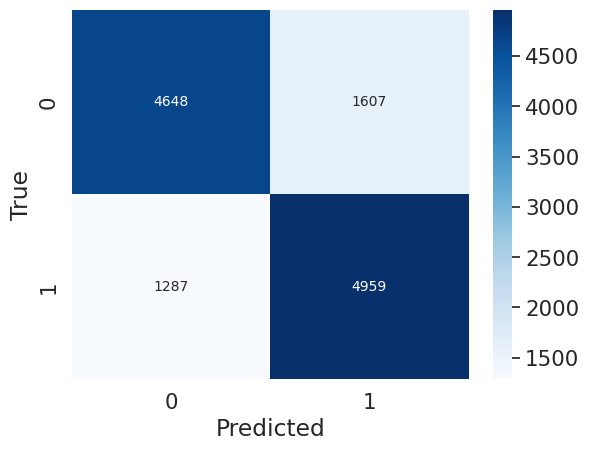

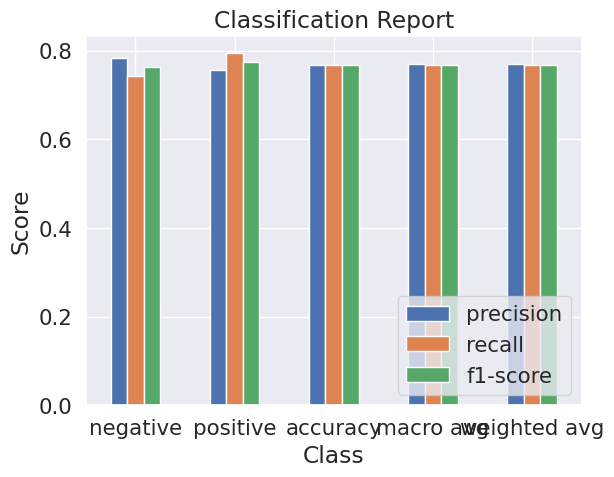

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv", header=None, names=["review", "sentiment"])

# Define the features and target
X = df["review"]
y = df["sentiment"]

# Create a Tfidf representation of the reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

# Evaluate the performance of the model
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
sns.set(font_scale=1.4)
# Change 'Blue' to 'Blues' to use the Blues colormap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 10}, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the precision, recall and F1 score using barplot
cr = classification_report(y_test, y_pred, output_dict=True)
df_cr = pd.DataFrame(cr).transpose()
df_cr = df_cr.drop('support', axis=1)
df_cr.plot(kind='bar', rot=0)
plt.title("Classification Report")
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".

In [ ]:
from sklearn.neural_network import MLPClassifier

# Load the IMDB dataset
imdb_data = pd.read_csv('IMDB Dataset.csv')

# Extract the features and labels
X = imdb_data['review']
y = imdb_data['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define different models with different numbers of hidden layers, hidden layer sizes, and activation functions
models = [

    MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=500),

    MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic', max_iter=500),

    MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=500),

]

# Train and evaluate each model
for model in models:
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    mlp_accuracy = accuracy_score(y_test, y_pred)
    # Change 'acc' to 'mlp_accuracy' in the print statement
    print(f"Model with hidden layers {model.hidden_layer_sizes} and activation {model.activation}: Accuracy = {mlp_accuracy:.4f}")

Model with hidden layers (50, 50) and activation relu: Accuracy = 0.8795
Model with hidden layers (50, 50) and activation logistic: Accuracy = 0.8837
Model with hidden layers (50, 50) and activation tanh: Accuracy = 0.8736


CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Step 1: Load the IMDB Dataset
df = pd.read_csv("IMDB Dataset.csv")

# Convert sentiments to binary (positive -> 1, negative -> 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 2: Split the dataset into train and test sets
X = df["review"]
y = df["sentiment"]

train_size = 0.75
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

# Step 3: Preprocess the text data
vocab_size = 10000  # Max number of unique words
maxlen = 200        # Max length of a review
embedding_dim = 100 # Dimension of the embedding vector

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Step 4: Create tf.data.Dataset pipelines
batch_size = 32

# Convert to tensors explicitly
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_padded, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_padded, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Step 5: Build the CNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Step 6: Train the model
epochs = 5

history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 8: Predict on test set 
predictions = model.predict(test_dataset)
predicted_labels = (predictions > 0.5).astype(int)
print("Predicted Sentiments:", predicted_labels.flatten()[:10])  # Show first 10 predictions


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1172/1172 - 95s - 81ms/step - accuracy: 0.8046 - loss: 0.4087 - val_accuracy: 0.8774 - val_loss: 0.2863
Epoch 2/5
1172/1172 - 141s - 120ms/step - accuracy: 0.9191 - loss: 0.2121 - val_accuracy: 0.8755 - val_loss: 0.3223
Epoch 3/5
1172/1172 - 90s - 77ms/step - accuracy: 0.9685 - loss: 0.0981 - val_accuracy: 0.8776 - val_loss: 0.4019
Epoch 4/5
1172/1172 - 90s - 76ms/step - accuracy: 0.9851 - loss: 0.0489 - val_accuracy: 0.8756 - val_loss: 0.4920
Epoch 5/5
1172/1172 - 89s - 76ms/step - accuracy: 0.9859 - loss: 0.0405 - val_accuracy: 0.8634 - val_loss: 0.6076
391/391 - 8s - 21ms/step - accuracy: 0.8634 - loss: 0.6076
Test Accuracy: 0.8634
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
Predicted Sentiments: [0 1 0 1 0 1 1 1 0 0]


# Results:



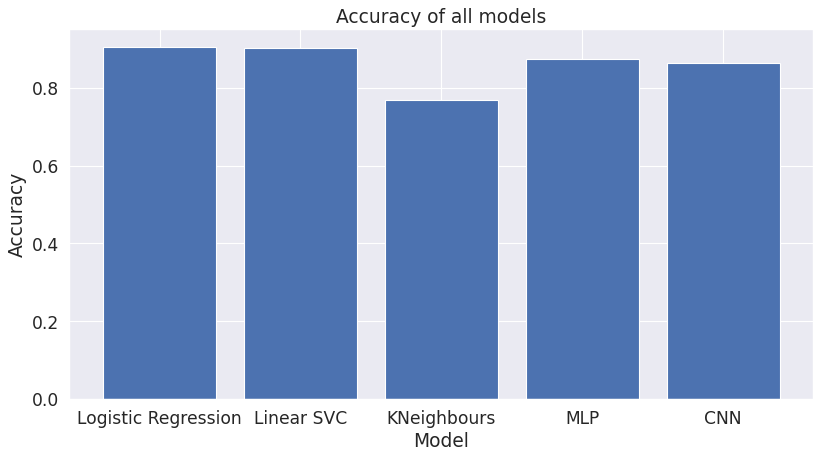

Model                  Accuracy
-------------------  ----------
Logistic Regression    0.905288
Linear SVC             0.901848
KNeighbours            0.768499
MLP                    0.8736
CNN                    0.86336


In [22]:
from matplotlib.pyplot import figure
from tabulate import tabulate

figure(figsize=(12, 6), dpi=80)

# Dictionary of models and their accuracy values
models = {'Logistic Regression': lr_accuracy, 'Linear SVC': lsvc_accuracy, 'KNeighbours': knn_accuracy, 'MLP': mlp_accuracy, 'CNN':test_accuracy}

# Extract model names and accuracy values
model_names = list(models.keys())
accuracy_values = list(models.values())

# Plot the accuracy values for all models
plt.bar(model_names, accuracy_values)
plt.title('Accuracy of all models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


# Create a list of lists with model names and accuracy values
table_data = []
for i in range(len(model_names)):
    table_data.append([model_names[i], accuracy_values[i]])

# Print the table
print(tabulate(table_data, headers=['Model', 'Accuracy']))
